<a href="https://colab.research.google.com/github/SumitMohan/Covid-19-Third-Wave-Prediction/blob/main/Covid_19_Third_Wave_Prediction_by_FB_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Covid-19 Analysis in India**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# **Data loading**

In [3]:
# Loading the covid-19 india date-wise record
df=pd.read_csv("/content/drive/MyDrive/covid_19_india.csv")
state_testing = pd.read_csv('/content/drive/MyDrive/StatewiseTestingDetails.csv')
df_vc = pd.read_csv('/content/drive/MyDrive/covid_vaccine_statewise.csv')

In [4]:
# Overviewing the data before modifications
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [6]:
# Checking for any null values
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [7]:
# Dropping the columns which are not going to be used

df.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"],inplace=True,axis=1)

In [8]:
#finding the active cases

df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [9]:
df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


In [10]:
df['Confirmed'] = pd.to_numeric(df['Confirmed'], errors='coerce')
df['Confirmed']=df['Confirmed'].fillna(0)
df['Confirmed']=df['Confirmed'].astype('int')

df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')
df['Deaths']=df['Deaths'].fillna(0)
df['Deaths']=df['Deaths'].astype('int')

df['Cured'] = pd.to_numeric(df['Cured'], errors='coerce')
df['Cured']=df['Cured'].fillna(0)
df['Cured']=df['Cured'].astype('int')

df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')
df['Deaths']=df['Deaths'].fillna(0)
df['Deaths']=df['Deaths'].astype('int')

df['Cured'] = pd.to_numeric(df['Cured'], errors='coerce')
df['Cured']=df['Cured'].fillna(0)
df['Cured']=df['Cured'].astype('int')

# State wise Analysis

In [11]:
statewise = pd.pivot_table(df, values=['Confirmed','Deaths','Cured'], index='State/UnionTerritory', aggfunc='max')
statewise['Recovery Rate'] = statewise['Cured']*100 / statewise['Confirmed']
statewise['Mortality Rate'] = statewise['Deaths']*100 /statewise['Confirmed']
statewise = statewise.sort_values(by='Confirmed', ascending= False)
statewise.style.background_gradient(cmap='YlOrRd')

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


It's no brainer that Maharshtra tops this list in all aspect

Considering the number of cases Punjab has done a great job when it comes to recovery rate

Similarly in terms of mortality rate West Bengal and Gujarat seem to have higher numbers

Tamilnadu, Maharshtra, Andhra Pradesh and Rajastan respectively had ramped up their testing capabilities

Though being second in the country w.r.t. total confirmed cases Tamilnadu seem to have established the healthcare facility to a higher level which is evident from the lower mortality rate (0.6%)

In [12]:
# Data Cleaning
state_testing['TotalSamples']=state_testing['TotalSamples'].fillna(0)
state_testing['TotalSamples']=state_testing['TotalSamples'].astype('int')
state_testing['Positive']=state_testing['Positive'].fillna(0)
state_testing['Positive']=state_testing['Positive'].astype('int')
state_testing['Negative']=state_testing['Negative'].fillna(0)
#state_testing['Negative']=state_testing['Negative'].astype('int')

In [13]:
statewise_testing = pd.pivot_table(state_testing, values=['TotalSamples','Positive','Negative'], index='State', aggfunc='max')
statewise_testing['Positive_Case_Rate'] = statewise_testing['Positive']*100 / statewise_testing['TotalSamples']
statewise_testing['Positive_Case_Rate']=round(statewise_testing['Positive_Case_Rate'].astype('int'),2)
statewise_testing = statewise_testing.sort_values(by='TotalSamples', ascending= False)
statewise_testing.style.background_gradient(cmap='YlOrRd')

,Positive,TotalSamples,Positive_Case_Rate
State,,,
Uttar Pradesh,126722,67897856,0
Maharashtra,1638961,49905065,3
Karnataka,264546,40104915,0
Tamil Nadu,367430,39002757,0
Bihar,90553,38820518,0
Kerala,932639,28745545,3
Gujarat,136004,26192626,0
Andhra Pradesh,235525,25311733,0
Delhi,151928,24333906,0


# Visualizations

In [14]:
# Data Visualization Liraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from IPython.display import display, Markdown

In [15]:
testing=state_testing.groupby('State')['TotalSamples'].max().sort_values(ascending=False).reset_index()
fig = px.bar(testing, 
             x="TotalSamples",
             y="State", 
             orientation='h',
             height=800,
             title='Statewise Testing',
            color='State')
fig.show()

In [16]:
plt.figure(figsize = (18,10))
figure = px.line(df, x='Date', y='Confirmed', color='State/UnionTerritory')
figure.update_xaxes(rangeslider_visible=True)
pyo.iplot(figure)

<Figure size 1296x720 with 0 Axes>

Above data shows Maharastra has more number of active cases.

In [17]:
# Adding Location data (Latitude,Longitude)
locations = {
    "Kerala" : [10.8505,76.2711],
    "Maharashtra" : [19.7515,75.7139],
    "Karnataka": [15.3173,75.7139],
    "Telangana": [18.1124,79.0193],
    "Uttar Pradesh": [26.8467,80.9462],
    "Rajasthan": [27.0238,74.2179],
    "Gujarat":[22.2587,71.1924],
    "Delhi" : [28.7041,77.1025],
    "Punjab":[31.1471,75.3412],
    "Tamil Nadu": [11.1271,78.6569],
    "Haryana": [29.0588,76.0856],
    "Madhya Pradesh":[22.9734,78.6569],
    "Jammu and Kashmir":[33.7782,76.5762],
    "Ladakh": [34.1526,77.5770],
    "Andhra Pradesh":[15.9129,79.7400],
    "West Bengal": [22.9868,87.8550],
    "Bihar": [25.0961,85.3131],
    "Chhattisgarh":[21.2787,81.8661],
    "Chandigarh":[30.7333,76.7794],
    "Uttarakhand":[30.0668,79.0193],
    "Himachal Pradesh":[31.1048,77.1734],
    "Goa": [15.2993,74.1240],
    "Odisha":[20.9517,85.0985],
    "Andaman and Nicobar Islands": [11.7401,92.6586],
    "Puducherry":[11.9416,79.8083],
    "Manipur":[24.6637,93.9063],
    "Mizoram":[23.1645,92.9376],
    "Assam":[26.2006,92.9376],
    "Meghalaya":[25.4670,91.3662],
    "Tripura":[23.9408,91.9882],
    "Arunachal Pradesh":[28.2180,94.7278],
    "Jharkhand" : [23.6102,85.2799],
    "Nagaland": [26.1584,94.5624],
    "Sikkim": [27.5330,88.5122],
    "Dadra and Nagar Haveli":[20.1809,73.0169],
    "Lakshadweep":[10.5667,72.6417],
    "Daman and Diu":[20.4283,72.8397]    
}
statewise["Lat"] = ""
statewise["Long"] = ""

for index in statewise.index :
    if index in locations:
        statewise.loc[statewise.index == index,"Lat"] = locations[index][0]
        statewise.loc[statewise.index == index,"Long"] = locations[index][1]
    else:
        statewise.drop([index],inplace=True)

In [18]:
!pip install folium

In [19]:
import folium  
from IPython.display import HTML, display
india = folium.Map(location=[23,80], zoom_start=4,max_zoom=6,min_zoom=4,height=300,width="80%")
for i in range(0,len(statewise[statewise['Confirmed']>0].index)):
    folium.Circle(
        location=[statewise.iloc[i]['Lat'], statewise.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+statewise.iloc[i].name+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(statewise.iloc[i]['Confirmed'])+"</li>"+
        "<li>Cured:   "+str(statewise.iloc[i]['Cured'])+"</li>"+
        "<li>Deaths:   "+str(statewise.iloc[i]['Deaths'])+"</li>"+
        "<li>Recovery Rate:   "+str(np.round(statewise.iloc[i]['Recovery Rate'],2))+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(statewise.iloc[i]['Mortality Rate'],2))+"</li>"+
        "</ul>"
        ,
        radius=(int(np.log2(statewise.iloc[i]['Confirmed']+1)))*15000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(india)
india

In [20]:
df1=df.groupby('Date')[['Cured','Deaths','Confirmed']].sum()

In [21]:
df1.tail()

,Cured,Deaths,Confirmed
Date,,,
2021-08-07,31055861,427371,31895385
2021-08-08,31099771,427862,31934455
2021-08-09,31139457,428309,31969954
2021-08-10,31180968,428682,31998158
2021-08-11,31220981,429179,32036511


In [22]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df1.index, y=df1["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=df1.index, y=df1["Cured"],
                    mode='lines+markers',
                    name='Cured Cases'))
fig.add_trace(go.Scatter(x=df1.index, y=df1["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases in India",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [23]:
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=df1.index, y=(df1["Cured"]/df1["Confirmed"])*100,
              name="Recovery Rate""Mortality Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df1.index, y=(df1["Deaths"]/df1["Confirmed"])*100,
              name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Mortality Rate", row=2, col=1)
fig.show()

Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100

Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100

Recovery Rate was initially very high when the number of positive (Confirmed) cases were low and showed a drastic drop with increasing number of cases. Increasing Mortality rate and dropped Recovery Rate is worrying sign for India.

Increasing Mortality Rate and very slowly increasing Recovery Rate is conclusive evidence for increase in number of Closed Cases

Recovery Rate is showing an upward trend which is a really good sign. Mortality Rate is showing a slight dips but with occasional upward trends.

In [24]:
growth_diff = []

for i in range(1,len(df1['Confirmed'])):
    growth_diff.append(df1['Confirmed'][i] / df1['Confirmed'][i-1])

growth_factor = sum(growth_diff)/len(growth_diff)
print('Average growth factor',growth_factor)

Average growth factor 1.0370264842594674


In [25]:
df1.reset_index(inplace=True)
df1.head()

,Date,Cured,Deaths,Confirmed
0,2020-01-30,0,0,1
1,2020-01-31,0,0,1
2,2020-02-01,0,0,2
3,2020-02-02,0,0,3
4,2020-02-03,0,0,3


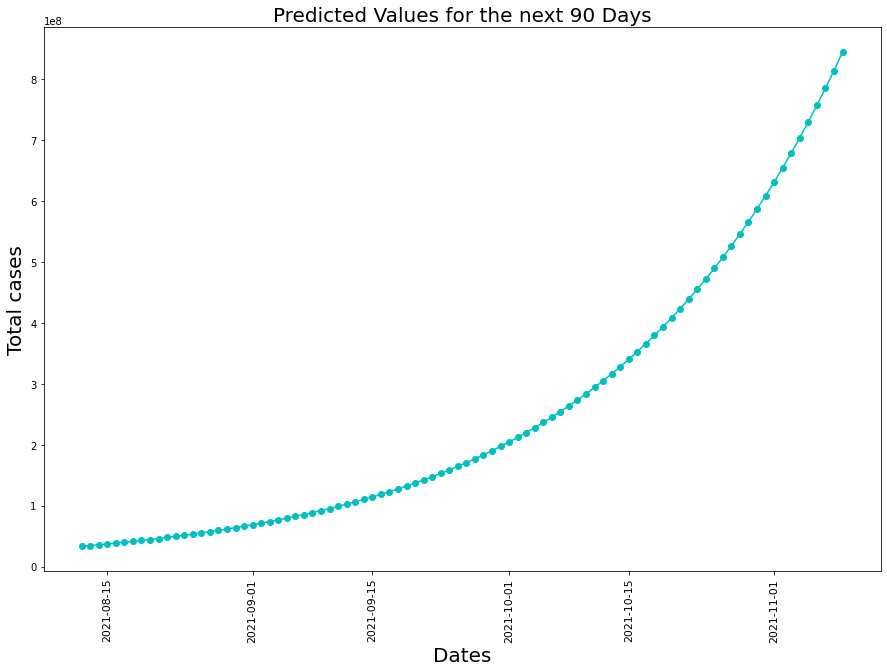

In [26]:
prediction_dates = []
from datetime import datetime,timedelta
df1['Date']=pd.to_datetime(df1['Date'], format='%Y-%m-%d')
start_date = df1['Date'][len(df1['Date']) - 1]
for i in range(90):
    date = start_date +timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
previous_day_cases = df1['Confirmed'][len(df1['Date']) - 1]
predicted_cases = []

for i in range(90):
    predicted_value = previous_day_cases *  growth_factor
    predicted_cases.append(predicted_value)
    previous_day_cases = predicted_value

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 90 Days" , fontsize = 20)
ax1 = plt.plot_date(y= predicted_cases,x= prediction_dates,linestyle ='-',color = 'c')

We could see that the graph is increasing exponentialy if the average growth factor doesn't decrease. It is important that the growth factor is reduced to flatten the curve.

# Effect of Lockdown

On 24 March 2020, PM Narendra Modi announced a complete nationwide lockdown

* No lockdown= 2020-01-30 to 2020-03-24
* lockdown 1= 2020-03-24 to 2020-07-15
* Lockdown_2= 2020-07-15 to 2020-11-04
* Lockdown_3= 2020-11-04 to 2021-02-19
* Lockdown_4= 2021-02-19 to 2021-05-31
* Unlock_1= 2020-06-01 to 2020-06-30
* Unlock_2= 2020-07-01 to present

In [27]:
No_Lockdown=df1[df1["Date"]<pd.to_datetime("2020-03-24")]
Lockdown_1=df1[(df1["Date"]>=pd.to_datetime("2020-03-24"))&(df1["Date"]<pd.to_datetime("2020-07-15"))]
Lockdown_2=df1[(df1["Date"]>=pd.to_datetime("2020-07-15"))&(df1["Date"]<pd.to_datetime("2020-11-04"))]
Lockdown_3=df1[(df1["Date"]>=pd.to_datetime("2020-11-04"))&(df1["Date"]<pd.to_datetime("2021-02-19"))]
Lockdown_4=df1[(df1["Date"]>=pd.to_datetime("2021-02-19"))&(df1["Date"]<=pd.to_datetime("2021-05-31"))]
Unlock_1=df1[(df1["Date"]>=pd.to_datetime("2020-06-01"))&(df1["Date"]<=pd.to_datetime("2020-06-30"))]
Unlock_2=df1[(df1["Date"]>=pd.to_datetime("2020-07-01"))]

No_Lockdown_datewise=No_Lockdown.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Lockdown_1_datewise=Lockdown_1.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Lockdown_2_datewise=Lockdown_2.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Lockdown_3_datewise=Lockdown_3.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Lockdown_4_datewise=Lockdown_4.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Unlock_1_datewise=Unlock_1.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Unlock_2_datewise=Unlock_2.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})

No_Lockdown_datewise["Active Cases"]=No_Lockdown_datewise["Confirmed"]-No_Lockdown_datewise["Cured"]-No_Lockdown_datewise["Deaths"]
Lockdown_1_datewise["Active Cases"]=Lockdown_1_datewise["Confirmed"]-Lockdown_1_datewise["Cured"]-Lockdown_1_datewise["Deaths"]
Lockdown_2_datewise["Active Cases"]=Lockdown_2_datewise["Confirmed"]-Lockdown_2_datewise["Cured"]-Lockdown_2_datewise["Deaths"]
Lockdown_3_datewise["Active Cases"]=Lockdown_3_datewise["Confirmed"]-Lockdown_3_datewise["Cured"]-Lockdown_3_datewise["Deaths"]
Lockdown_4_datewise["Active Cases"]=Lockdown_4_datewise["Confirmed"]-Lockdown_4_datewise["Cured"]-Lockdown_4_datewise["Deaths"]
Unlock_1_datewise["Active Cases"]=Unlock_1_datewise["Confirmed"]-Unlock_1_datewise["Cured"]-Unlock_1_datewise["Deaths"]
Unlock_2_datewise["Active Cases"]=Unlock_2_datewise["Confirmed"]-Unlock_2_datewise["Cured"]-Unlock_2_datewise["Deaths"]

No_Lockdown_datewise["Days Since"]=(No_Lockdown_datewise.index-No_Lockdown_datewise.index.min()).days
Lockdown_1_datewise["Days Since"]=(Lockdown_1_datewise.index-Lockdown_1_datewise.index.min()).days
Lockdown_2_datewise["Days Since"]=(Lockdown_2_datewise.index-Lockdown_2_datewise.index.min()).days
Lockdown_3_datewise["Days Since"]=(Lockdown_3_datewise.index-Lockdown_3_datewise.index.min()).days
Lockdown_4_datewise["Days Since"]=(Lockdown_4_datewise.index-Lockdown_4_datewise.index.min()).days
Unlock_1_datewise["Days Since"]=(Unlock_1_datewise.index-Unlock_1_datewise.index.min()).days
Unlock_2_datewise["Days Since"]=(Unlock_2_datewise.index-Unlock_2_datewise.index.min()).days

print("Average Active Cases growth rate in Lockdown 1.0: ",(Lockdown_1_datewise["Active Cases"]/Lockdown_1_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 1.0: ",(Lockdown_1_datewise["Active Cases"]/Lockdown_1_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Lockdown 2.0: ",(Lockdown_2_datewise["Active Cases"]/Lockdown_2_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 2.0: ",(Lockdown_2_datewise["Active Cases"]/Lockdown_2_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Lockdown 3.0: ",(Lockdown_3_datewise["Active Cases"]/Lockdown_3_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 3.0: ",(Lockdown_3_datewise["Active Cases"]/Lockdown_3_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Lockdown 4.0: ",(Lockdown_4_datewise["Active Cases"]/Lockdown_4_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 4.0: ",(Lockdown_4_datewise["Active Cases"]/Lockdown_4_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Unlock 1.0: ",(Unlock_1_datewise["Active Cases"]/Unlock_1_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Unlock 1.0: ",(Unlock_1_datewise["Active Cases"]/Unlock_1_datewise["Active Cases"].shift()).median())

Average Active Cases growth rate in Lockdown 1.0:  1.0611560639753137
Median Active Cases growth rate in Lockdown 1.0:  1.0426155427017767
Average Active Cases growth rate in Lockdown 2.0:  1.004941539304629
Median Active Cases growth rate in Lockdown 2.0:  1.0051421081236613
Average Active Cases growth rate in Lockdown 3.0:  0.9869638774273347
Median Active Cases growth rate in Lockdown 3.0:  0.9881672030831116
Average Active Cases growth rate in Lockdown 4.0:  1.0276951647800772
Median Active Cases growth rate in Lockdown 4.0:  1.0303569221473008
Average Active Cases growth rate in Unlock 1.0:  1.0292823925483092
Median Active Cases growth rate in Unlock 1.0:  1.0286948988535212


In [28]:
fig=go.Figure()
fig.add_trace(go.Scatter(y=list(Lockdown_1_datewise["Active Cases"]/Lockdown_1_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Lockdown 1.0 Active Cases'))
fig.add_trace(go.Scatter(y=list(Lockdown_2_datewise["Active Cases"]/Lockdown_2_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Lockdown 2.0 Active Cases'))
fig.add_trace(go.Scatter(y=list(Lockdown_3_datewise["Active Cases"]/Lockdown_3_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Lockdown 3.0 Active Cases'))
fig.add_trace(go.Scatter(y=list(Lockdown_4_datewise["Active Cases"]/Lockdown_4_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Lockdown 4.0 Active Cases'))
fig.add_trace(go.Scatter(y=list(Unlock_1_datewise["Active Cases"]/Unlock_1_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Unlock 1.0 Active Cases'))
# fig.add_trace(go.Scatter(y=list(Unlock_2_datewise["Active Cases"]/Unlock_2_datewise["Active Cases"].shift()),
#                     mode='lines+markers',
#                     name='Growth Factor of Unlock 2.0 Active Cases'))
fig.update_layout(title="Lockdownwise Growth Factor of Active Cases in India",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=(dict(x=0,y=1,traceorder="normal")))
fig.show()

All Lockdowns seems to have shown a slight effect of the Growth Rate of Active Cases implying the COVID-19 controlling practices are working well.

The Growth rate of Active Cases has slowed down during each Lockdown.

Growth of Active Cases is showing a decreasing trend in Lockdown 3.0, probably because Lockdown 3.0 is much more lenient as compared to previous Lockdown versions

# Prediction

Fitting data into a Logistic Curve/Sigmoid equation: y=(L1/1+e−k(x−x0))+1

In [29]:
predIndiaDF = df1.copy()
extended_period = 2000
from scipy.optimize import curve_fit
def sigmoid(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0))) + 1

popt, pcov = curve_fit(sigmoid,  (predIndiaDF.index+1).astype(float), predIndiaDF['Confirmed'],  p0=(0,0,0),maxfev=5000 )

x0 = int(popt[2]/10)
print('\033[1mx0 (point/day of inflexion):\033[0m',int(popt[2]/10))
print('\033[1mL (Maximum no.of cases):\033[0m',int(popt[0]/10000) )
print('\033[1mk (Growth Rate):\033[0m',round(float(popt[1]),2) )
print('\033[1mPCOV: \033[0m\n',pcov )

fig = go.Figure()
dateRange = pd.date_range(pd.to_datetime(predIndiaDF['Date'].min()),\
                                         pd.to_datetime(predIndiaDF['Date'].min())+pd.DateOffset(extended_period))

fig.add_trace(go.Scatter(x = predIndiaDF['Date'],
                         y = predIndiaDF['Confirmed'],
                         mode = 'lines',
                         name = 'Observed'))
fig.add_trace(go.Scatter(x = dateRange[:600],
                         y = sigmoid([x for x in range(extended_period)],*popt),
                         mode = 'lines',
                         name = 'Predicted'))
fig.add_trace(go.Scatter(x = [dateRange[x0], dateRange[x0]],
                         y = [0,  sigmoid([x for x in range(extended_period)],*popt)[x0]],
                         name = 'X0 - Inflexion point',
                         mode = 'lines'))

fig.update_layout(template='plotly_dark',title='Projected Confirmed Cases')
fig.show(figsize=(8,5))

x0 (point/day of inflexion): 59
L (Maximum no.of cases): 8151
k (Growth Rate): 0.01
PCOV: 
 [[ 9.65384796e+13 -2.72822826e+03  2.43080876e+08]
 [-2.72822826e+03  8.91315475e-08 -7.05572390e-03]
 [ 2.43080876e+08 -7.05572390e-03  6.16079131e+02]]


**Facebook's Prophet Model Prediction**

In [30]:
from fbprophet import Prophet
fb_data = df1.copy()
fb_confirm = fb_data[['Date', 'Confirmed']]
fb_confirm = fb_confirm.rename(columns={'Date': 'ds',
                        'Confirmed': 'y'})

fb_confirm.head()

,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3


In [31]:
# Time Series Forecasting with Prophet
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)
my_model.fit(fb_confirm)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<fbprophet.forecaster.Prophet at 0x7f226810aa90>

In [32]:
# Creating a new dataframe
# Prophet provides the make_future_dataframe helper function
future_dates = my_model.make_future_dataframe(periods=10, freq='MS')
future_dates.tail()

,ds
565,2022-02-01
566,2022-03-01
567,2022-04-01
568,2022-05-01
569,2022-06-01


In [33]:
prediction=my_model.predict(future_dates)
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
565,2022-02-01,6.499576e+07,5.619166e+07,7.290385e+07,5.639183e+07,7.257264e+07,-19314.249645,-19314.249645,-19314.249645,-19314.249645,-19314.249645,-19314.249645,0.0,0.0,0.0,6.497644e+07
566,2022-03-01,6.962686e+07,5.832973e+07,8.029341e+07,5.925532e+07,7.896211e+07,-19314.249645,-19314.249645,-19314.249645,-19314.249645,-19314.249645,-19314.249645,0.0,0.0,0.0,6.960754e+07
567,2022-04-01,7.475415e+07,6.141334e+07,8.675533e+07,6.202543e+07,8.690896e+07,16030.100764,16030.100764,16030.100764,16030.100764,16030.100764,16030.100764,0.0,0.0,0.0,7.477018e+07
568,2022-05-01,7.971604e+07,6.430167e+07,9.485449e+07,6.436557e+07,9.495638e+07,4562.834651,4562.834651,4562.834651,4562.834651,4562.834651,4562.834651,0.0,0.0,0.0,7.972060e+07
569,2022-06-01,8.484333e+07,6.621694e+07,1.022151e+08,6.646909e+07,1.025106e+08,-28914.547406,-28914.547406,-28914.547406,-28914.547406,-28914.547406,-28914.547406,0.0,0.0,0.0,8.481441e+07


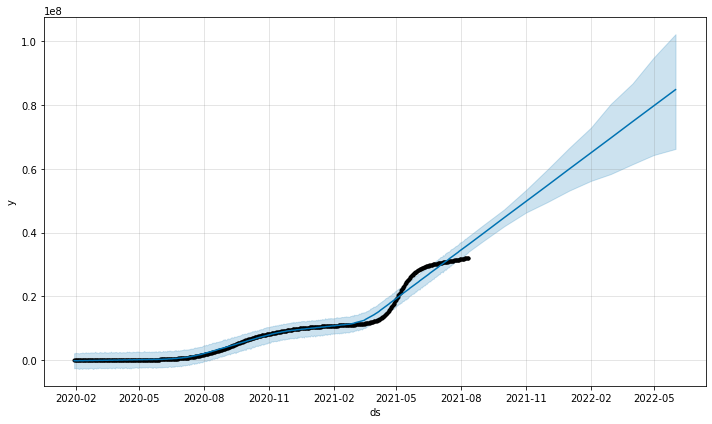

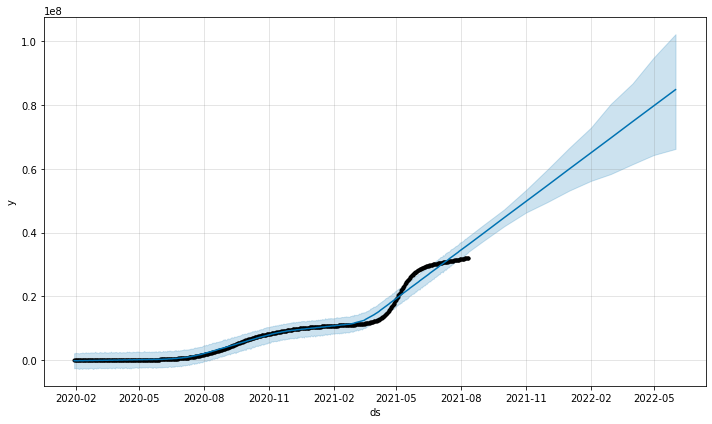

In [34]:
### plot the predicted projection
my_model.plot(prediction)

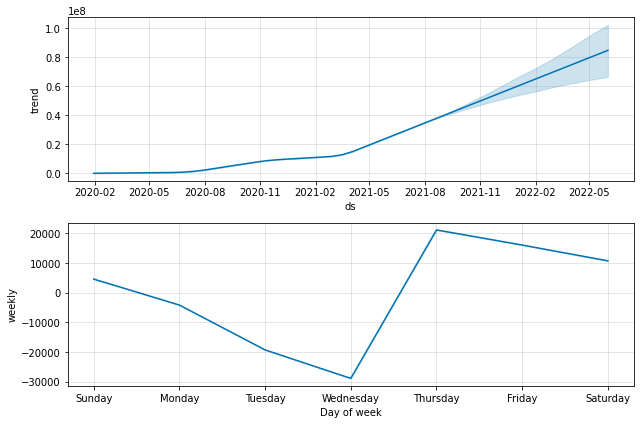

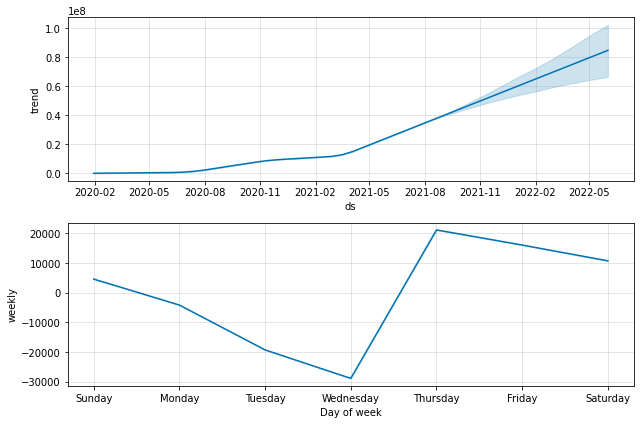

In [35]:
#### Visualize Each Components[Trends,yearly]
my_model.plot_components(prediction)

In [36]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(my_model, initial='30 days', period='10 days', horizon = '90 days')
df_cv.head()

INFO:fbprophet:Making 44 forecasts with cutoffs between 2020-03-09 00:00:00 and 2021-05-13 00:00:00


  0%|          | 0/44 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-10,17.105278,0.716286,34.057535,58,2020-03-09
1,2020-03-11,21.504746,4.469184,38.730697,60,2020-03-09
2,2020-03-12,22.921459,6.439937,40.124224,74,2020-03-09
3,2020-03-13,23.088273,6.289238,41.124438,81,2020-03-09
4,2020-03-14,23.755008,6.365515,40.079387,84,2020-03-09


In [37]:
df_cv.tail(5)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
3955,2021-08-07,2.577697e+07,2.245349e+07,2.889221e+07,31895385,2021-05-13
3956,2021-08-08,2.587800e+07,2.271847e+07,2.925299e+07,31934455,2021-05-13
3957,2021-08-09,2.597733e+07,2.256805e+07,2.945662e+07,31969954,2021-05-13
3958,2021-08-10,2.607027e+07,2.258676e+07,2.949502e+07,31998158,2021-05-13
3959,2021-08-11,2.616913e+07,2.261766e+07,2.970208e+07,32036511,2021-05-13


In [38]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,9 days,2.491663e+12,1.578500e+06,622397.820887,0.146576,0.067136,0.040404
1,10 days,2.748039e+12,1.657721e+06,662582.775243,0.154969,0.073924,0.037879
2,11 days,3.017092e+12,1.736978e+06,703421.226818,0.163270,0.079725,0.037879
3,12 days,3.298150e+12,1.816081e+06,744934.722980,0.171243,0.087448,0.037879
4,13 days,3.593368e+12,1.895618e+06,787285.835527,0.179066,0.093846,0.037879


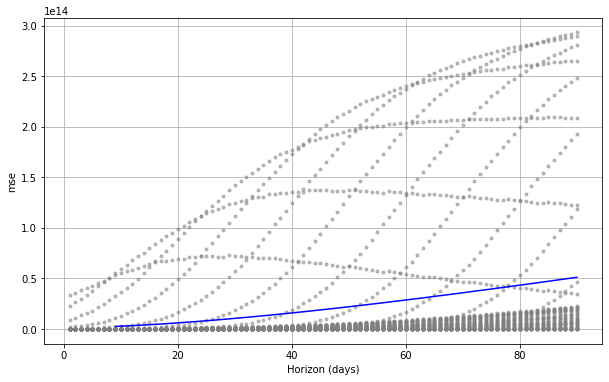

In [39]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mse')

In [40]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
565,2022-02-01,6.497644e+07,5.674954e+07,7.385793e+07
566,2022-03-01,6.960754e+07,5.904418e+07,7.976579e+07
567,2022-04-01,7.477018e+07,6.238322e+07,8.681597e+07
568,2022-05-01,7.972060e+07,6.465013e+07,9.398405e+07
569,2022-06-01,8.481441e+07,6.777365e+07,1.010947e+08


* ds: the datestamp of the forecasted value
* yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
* yhat_lower: the lower bound of our forecasts
* yhat_upper: the upper bound of our forecasts

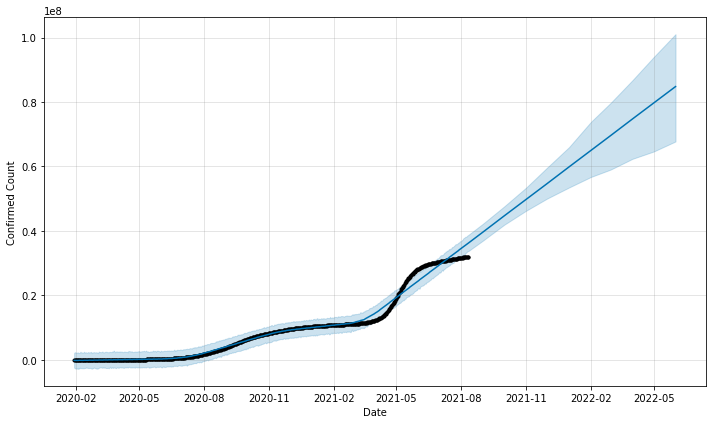

In [41]:
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
fig = plot_plotly(my_model, forecast)
pyo.iplot(fig) 

fig = my_model.plot(forecast,xlabel='Date',ylabel='Confirmed Count')

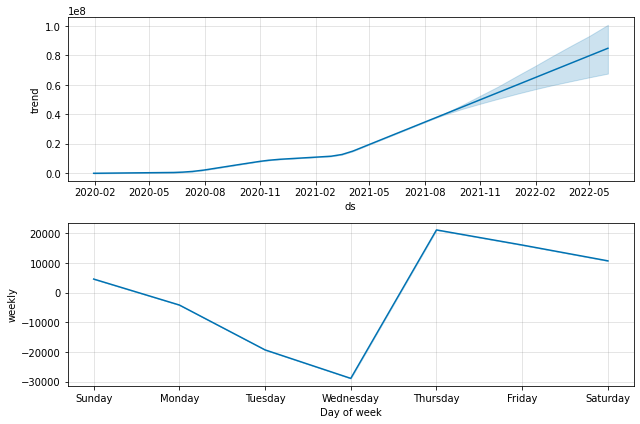

In [42]:
forecast_components=my_model.plot_components(forecast)

The infection trend is exponential and evident india has not yet reached the peak point

Towards weekend and beginning of the week the confirmed cases rate seem to be high

Movement of people during weekend and week beginning. This could contribute this rise

Social distancing not followed in some parts of the country as evident from various web sources and news channels

In [43]:
fb_Cured = fb_data[['Date', 'Cured']]
fb_Cured = fb_data.rename(columns={'Date': 'ds','Cured': 'y'})

m = Prophet()
m.fit(fb_Cured)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
                    mode='lines+markers',name='Predicted Cases',marker_color='green'))
fig.add_trace(go.Scatter(x=fb_Cured['ds'], y=fb_Cured['y'],
                    mode='lines+markers',name='Actual Cases',marker_color='yellow'))
fig.update_layout(
    title='Forecasting of Cured in INDIA for Next 30 Days')
fig.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
fb_death = fb_data[['Date', 'Deaths']]
fb_death = fb_death.rename(columns={'Date': 'ds','Deaths': 'y'})

m = Prophet()
m.fit(fb_death)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
                    mode='lines+markers',name='Predicted Cases',marker_color='red'))
fig.add_trace(go.Scatter(x=fb_death['ds'], y=fb_death['y'],
                    mode='lines+markers',name='Actual Cases',marker_color='blue'))
fig.update_layout(title='Forecasting of Deaths in INDIA for Next 30 Days')
fig.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
